# Diabetes prediction

Diabetes telah menjadi penyakit yang umum terjadi di era sekarang ini dan hampir 10,5% populasi orang dewasa di dunia mengidap diabetes. Kurangnya aktivitas fisik dan urbanisasi telah dikaitkan sebagai penyebab utama diabetes. Membuat model yang dapat membantu memprediksi apakah seseorang menderita diabetes atau tidak dapat sangat membantu untuk diagnosis dini dan pencegahan penyakit ini.

## Table of contents

1. Importing the library
2. Data cleaning & preparation
3. Exploratory data analysis
4. Feature Engineering
5. Model training and evaluation
6. Model inference demo

## Importing the library


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# memuat dataset dengan menggunakan pandas

df = pd.read_csv('data/diabetes_prediction_dataset.csv')

## Data Cleaning & Preparation


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(96146, 9)

The data was checked for duplicate values and those values were dropped resulting in the new shape of the data.

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

There are no null values in the data set.
The distribution of the values in the target column shows that the dataset is significantly imbalanced which will be taken care of during feature engineering.

## Exploratory Data Analysis

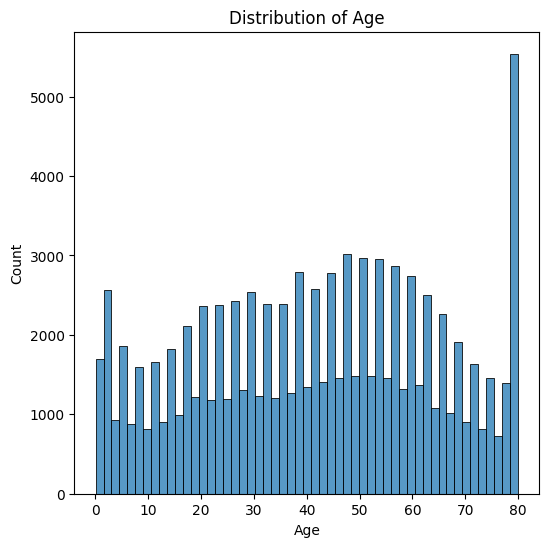

In [8]:
plt.figure(figsize=(6, 6))
sns.histplot(df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

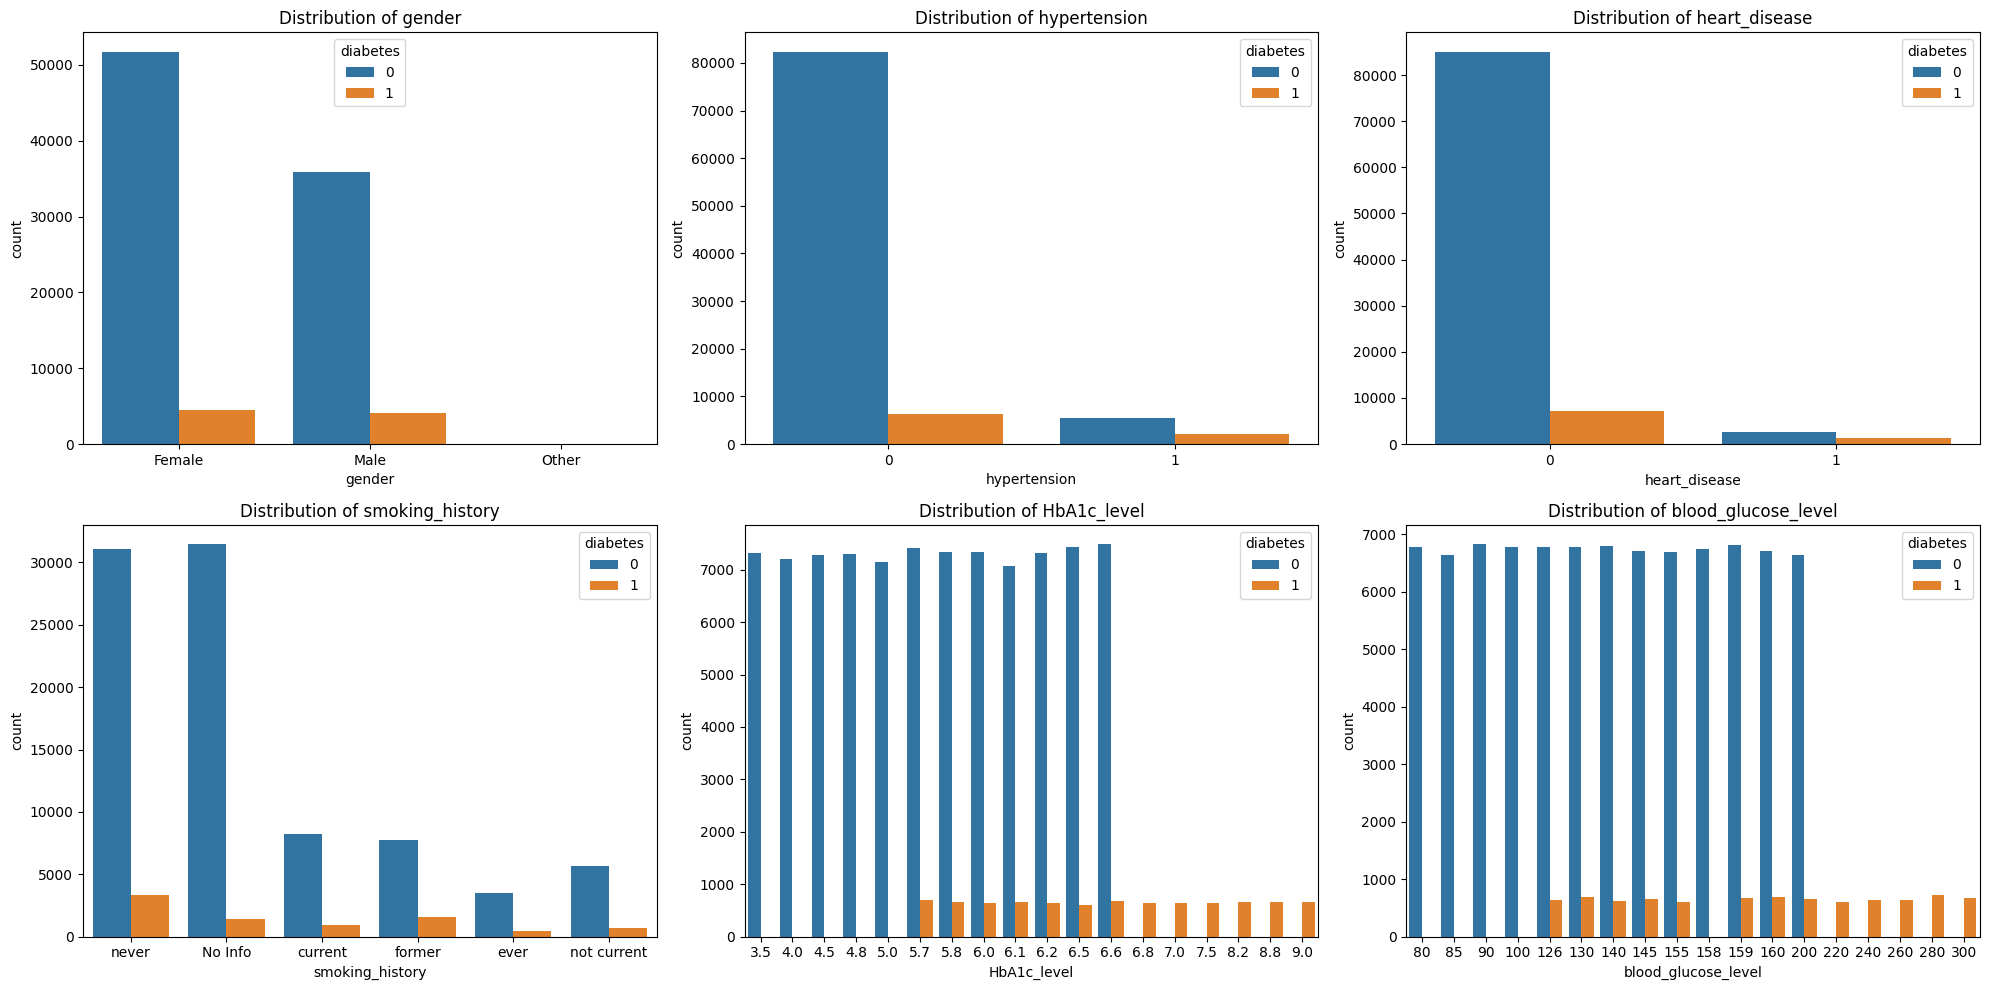

In [9]:
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']
# defining the categorical variables to create multiple plots using one code
nrows = 2    #plotting the graphs on the same page
ncols = 3

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(categorical_vars):                       #creating for loop for all the variables
    ax = axs[i]
    sns.countplot(x=var, data=df, hue='diabetes', ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()   #prevents overlapping
plt.show()

Inferences from the analysis:
* The main dependencies can be observed in the HbA1c levels and the blood glucose levels. The higher values of these two factors can be seen corresponding to diabetes.
* It is further observed that females are at a slightly greater risk of developing diabetes as compared to males.

## Feature Engineering

In [10]:
# converting the categorical values to numeric values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

In [11]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


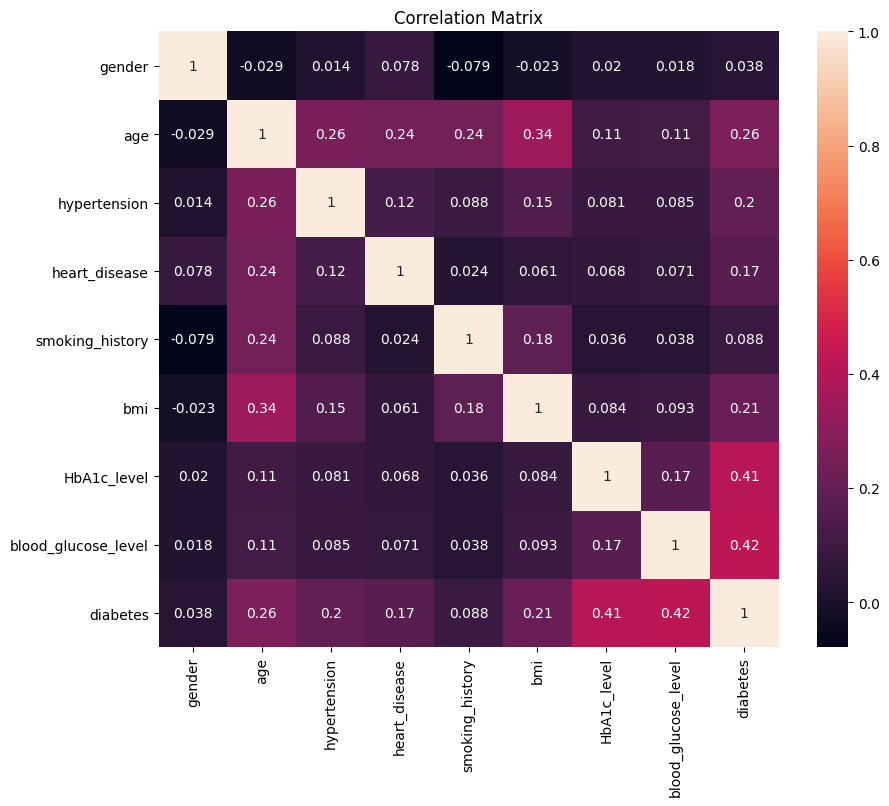

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True )
plt_title = plt.title("Correlation Matrix")

In [13]:
# handling the imbalanced dataset
from imblearn.over_sampling import SMOTE

X = df.drop('diabetes', axis=1)
Y = df['diabetes']

# Y.value_counts()
# X.unique()

smk = SMOTE(random_state=42)
X_resampled, Y_resampled = smk.fit_resample(X, Y)

resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(Y_resampled, columns=['diabetes'])], axis=1)
resampled_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [14]:
resampled_df['diabetes'].value_counts()

0    87664
1    87664
Name: diabetes, dtype: int64

In [15]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
X = resampled_df.drop('diabetes', axis=1)
Y = resampled_df['diabetes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(140262, 8)
(35066, 8)


## Model Training and Evaluation

In [16]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
accuracy = rfc.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9738207950721497


In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
rfc_predict=rfc.predict(X_test)
rfc_predict
cr=classification_report(Y_test,rfc_predict)
print (cr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17439
           1       0.97      0.97      0.97     17627

    accuracy                           0.97     35066
   macro avg       0.97      0.97      0.97     35066
weighted avg       0.97      0.97      0.97     35066



Text(50.722222222222214, 0.5, 'Actual value')

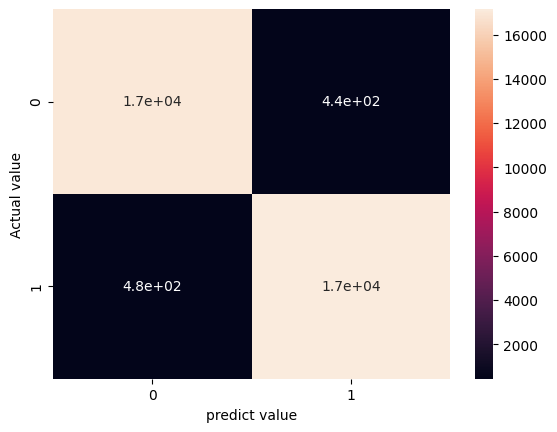

In [18]:
cm = confusion_matrix(Y_test, rfc_predict)
sns.heatmap(cm,annot=True)
plt.xlabel("predict value")
plt.ylabel('Actual value')

In [19]:
# # Tuning Hyperparameter
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
# }
# grid = GridSearchCV(rfc, param_grid, verbose=2, n_jobs=-1)
# grid.fit(X_train, Y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=50; total time=   4.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=50; total time=   4.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100; total time=   8.3s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=50; total time=   2.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=50; total time=   2.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=50; total time=   2.3s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, 

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'n_estimators': [50, 100]},
             verbose=2)

In [ ]:
# accuracy = grid.score(X_test, Y_test)
# print("Accuracy:", accuracy)

Accuracy: 0.9651514287343866


## Save & load model with Pickle

In [22]:
# Save model to pickle
import pickle 

pickle.dump(rfc, open('model.pkl', 'wb'))

In [23]:
# Load model and inference model with Pickle

# creating a predictive system
input_data = (0,36.0,0,0,1,23.45,5.0,155)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

model = pickle.load(open('model.pkl', 'rb'))

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
